In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

from MultiArmedBandit import Arm, bernoulliArm, evolvingBernoulliArm
from Exp3 import exp3_Bianchi, exp3P_Bianchi, exp3_IX
from OtherBanditAlgorithms import UCB1, Random

Populating the interactive namespace from numpy and matplotlib


## 1st Environment

In [2]:
T = 15000
T2 = 5000
MAB_simple = [evolvingBernoulliArm([0.8, 0.1], T2)]
MAB_simple.append(evolvingBernoulliArm([0.1, 0.9], T2))

In [6]:
#Calculate best arm cumulated reward
best_cumsum = [0.1 * t for t in range(1, T2 + 1)]
best_cumsum += [0.1 * T2 + 0.9 * (t -  T2) for t in range(T2 + 1, T + 1)]

## Hyperparameters


In [3]:
K = len(MAB_simple)
eta_exp3 = np.sqrt(2 * np.log(K) / T * K)
gamma_exp3 = np.sqrt(K * log(K) / ((np.exp(1) - 1) * T))

delta = 0.05
eta_exp3P = 0.95 * np.sqrt(np.log(K) / (T * K))
gamma_exp3P = 1.05 * np.sqrt(np.log(K) * K / T)
beta = np.sqrt(np.log(K / delta) /  (T * K))

eta_exp3IX = np.sqrt(2 * np.log(K) / T * K)

In [4]:
print(eta_exp3, gamma_exp3, delta, eta_exp3P, gamma_exp3P, beta, eta_exp3IX)

0.0135955598689 0.00733389858595 0.05 0.00456641847424 0.0100941882062 0.0110888524415 0.0135955598689


## Experiment

In [5]:
nb_iter = 50
Weights = np.zeros((3, T, K))
Rewards = np.zeros((nb_iter, 4, T))
Prob = np.zeros((3, T, K))
nb_iter = 50

for i in range(nb_iter):
    #run 4 algorithms
    rew, weights_exp, proba_hist_exp3 = exp3_Bianchi(MAB_simple, T, eta_exp3, gamma=gamma_exp3)
    rew_P, weights_expP, proba_hist_expP = exp3P_Bianchi(MAB_simple, T, beta=beta, gamma=gamma_exp3P, eta=eta_exp3P)
    rew_IX, weights_expIX, proba_hist_expIX = exp3_IX(MAB_simple, T, eta_exp3IX, gamma=eta_exp3IX / 2)
    rew_UCB, _ = UCB1(MAB_simple, T, rho=0.2)
    #calculate cumulated reward
    rewUCB_cumsum = np.cumsum(rew_UCB)
    rew_cumsum = np.cumsum(rew)
    rewP_cumsum = np.cumsum(rew_P)
    rewIX_cumsum = np.cumsum(rew_IX)
    #save cumulated rewards, weights and probability distribution
    Rewards[i] = [rew_cumsum, rewP_cumsum, rewIX_cumsum, rewUCB_cumsum]
    Weights += [weights_exp, weights_expP, weights_expIX]
    Prob += [proba_hist_exp3, proba_hist_expP, proba_hist_expIX]
    
# calculate statistics
Rewards_cum = np.mean(Rewards, axis=0)
Rewards_std = np.std(Rewards, axis=0)
Weights /= nb_iter
Prob /= nb_iter

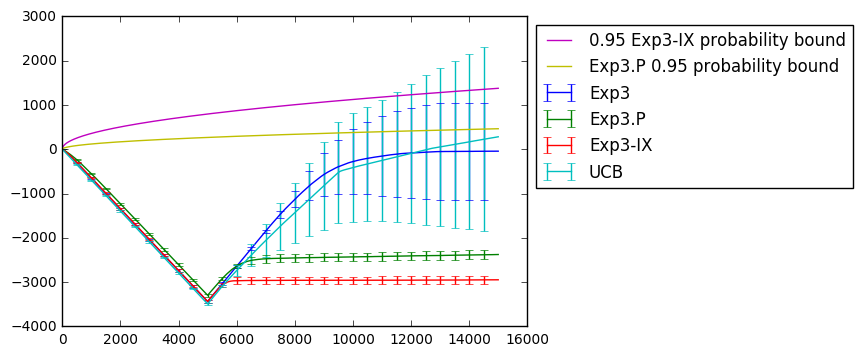

In [7]:
#cumulated rewards with std plot
plt.errorbar(np.arange(T), best_cumsum - Rewards_cum[0], Rewards_std[0], errorevery=500, label="Exp3")
plt.errorbar(np.arange(T), best_cumsum - Rewards_cum[1], Rewards_std[1], errorevery=500, label="Exp3.P")
plt.errorbar(np.arange(T), best_cumsum - Rewards_cum[2], Rewards_std[2], errorevery=500, label="Exp3-IX")
plt.errorbar(np.arange(T), best_cumsum - Rewards_cum[3], Rewards_std[3], errorevery=500, label="UCB")

delta = 0.05
#0.95 bound for Exp3-IX
plt.plot([2 * np.sqrt(K * t * np.log(K)) + (np.sqrt(2 * K * t / (log(K))) + 1) * log(2 / delta) for t in range(1, T + 1)], label="0.95 Exp3-IX probability bound")
plt.plot([5.15 * np.sqrt(t * K / np.log(K / delta)) for t in range(T)], label="Exp3.P 0.95 probability bound")
plt.legend(loc="upper left", bbox_to_anchor=(1., 1.))


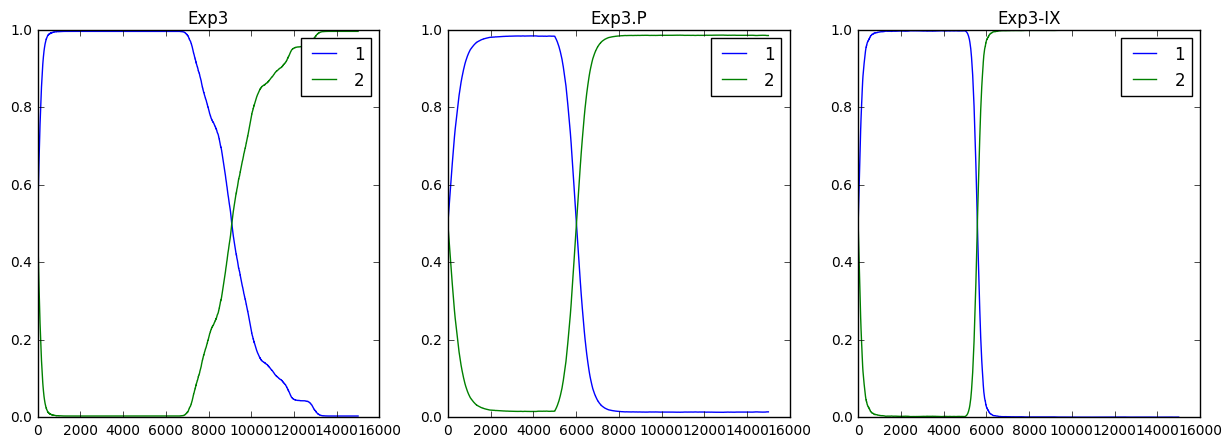

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

plt.plot(Prob[0])
plt.legend([1, 2])
plt.title("Exp3")

plt.subplot(1, 3, 2)

plt.plot(Prob[1])
plt.legend([1, 2])
plt.title("Exp3.P")

plt.subplot(1, 3, 3)
plt.plot(Prob[2])
plt.title("Exp3-IX")
plt.legend([1, 2])

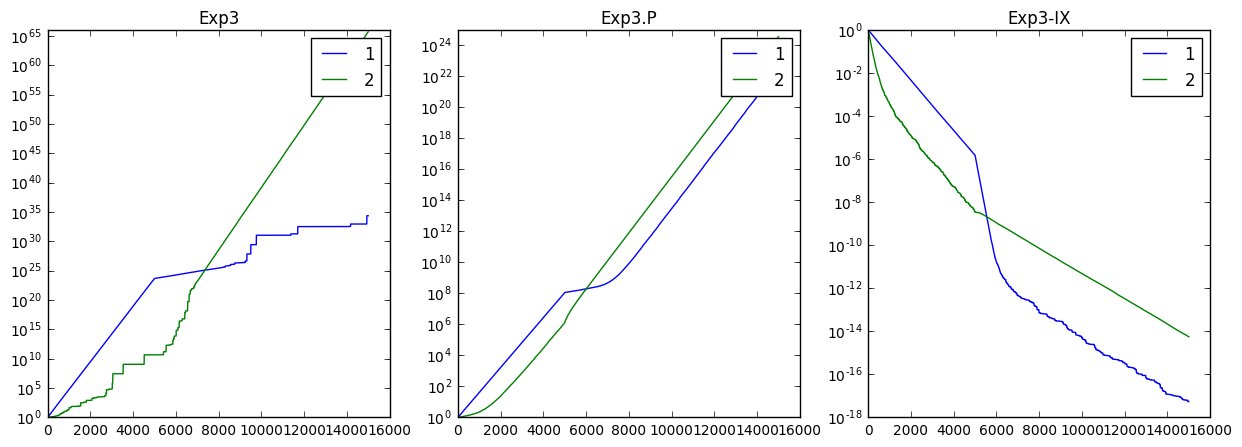

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

plt.semilogy()
plt.plot(Weights[0])
plt.title("Exp3")
plt.legend([1, 2])

plt.subplot(1, 3, 2)

plt.semilogy()
plt.plot(Weights[1])
plt.title("Exp3.P")
plt.legend([1, 2])

plt.subplot(1, 3, 3)

plt.semilogy()
plt.plot(Weights[2])
plt.title("Exp3-IX")

plt.legend([1, 2])

## 2nd Environment

In [21]:
T = 15000
T2 = 5000
MAB_simple = [evolvingBernoulliArm([0.51, 0.49], T2)]
MAB_simple.append(evolvingBernoulliArm([0.49, 0.506], T2))

In [22]:
#best arm cumulated reward
best_cumsum = [0.49 * t for t in range(1, T2 + 1)]
best_cumsum += [0.49 * T2 + 0.505 * (t -  T2) for t in range(T2 + 1, T + 1)]

## Hyperparameters


In [23]:
K = len(MAB_simple)
eta_exp3 = np.sqrt(2 * np.log(K) / T * K)
gamma_exp3 = np.sqrt(K * log(K) / ((np.exp(1) - 1) * T))

delta = 0.05
eta_exp3P = 0.95 * np.sqrt(np.log(K) / (T * K))
gamma_exp3P = 1.05 * np.sqrt(np.log(K) * K / T)
beta = np.sqrt(np.log(K / delta) /  (T * K))

eta_exp3IX = np.sqrt(2 * np.log(K) / T * K)

In [24]:
print(eta_exp3, gamma_exp3, delta, eta_exp3P, gamma_exp3P, beta, eta_exp3IX)

0.0135955598689 0.00733389858595 0.05 0.00456641847424 0.0100941882062 0.0110888524415 0.0135955598689


## Experiment

In [25]:
nb_iter = 50
Weights = np.zeros((3, T, K))
Rewards = np.zeros((nb_iter, 4, T))
Prob = np.zeros((3, T, K))
nb_iter = 50

for i in range(nb_iter):
    #run 4 algorithms
    rew, weights_exp, proba_hist_exp3 = exp3_Bianchi(MAB_simple, T, eta_exp3, gamma=gamma_exp3)
    rew_P, weights_expP, proba_hist_expP = exp3P_Bianchi(MAB_simple, T, beta=beta, gamma=gamma_exp3P, eta=eta_exp3P)
    rew_IX, weights_expIX, proba_hist_expIX = exp3_IX(MAB_simple, T, eta_exp3IX, gamma=eta_exp3IX / 2)
    rew_UCB, _ = UCB1(MAB_simple, T, rho=0.2)
    #calculate cumulated reward
    rewUCB_cumsum = np.cumsum(rew_UCB)
    rew_cumsum = np.cumsum(rew)
    rewP_cumsum = np.cumsum(rew_P)
    rewIX_cumsum = np.cumsum(rew_IX)
    #save cumulated rewards, weights and probability distribution
    Rewards[i] = [rew_cumsum, rewP_cumsum, rewIX_cumsum, rewUCB_cumsum]
    Weights += [weights_exp, weights_expP, weights_expIX]
    Prob += [proba_hist_exp3, proba_hist_expP, proba_hist_expIX]
# calculate statistics
Rewards_cum = np.mean(Rewards, axis=0)
Rewards_std = np.std(Rewards, axis=0)
Weights /= nb_iter
Prob /= nb_iter

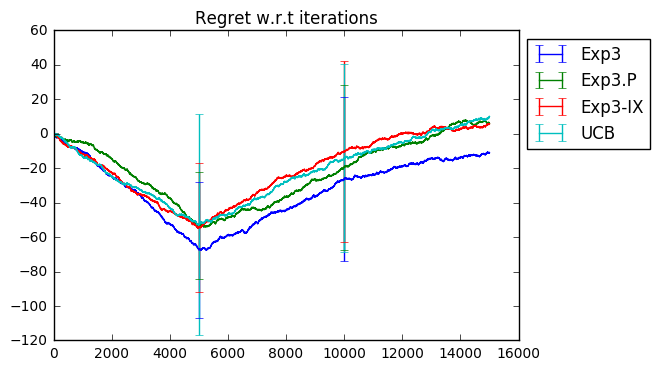

In [26]:
#cumulated rewards with std plot
plt.errorbar(np.arange(T), best_cumsum - Rewards_cum[0], Rewards_std[0], errorevery=5000, label="Exp3")
plt.errorbar(np.arange(T), best_cumsum - Rewards_cum[1], Rewards_std[1], errorevery=5000, label="Exp3.P")
plt.errorbar(np.arange(T), best_cumsum - Rewards_cum[2], Rewards_std[2], errorevery=5000, label="Exp3-IX")
plt.errorbar(np.arange(T), best_cumsum - Rewards_cum[3], Rewards_std[3], errorevery=5000, label="UCB")
delta = 0.05
#0.95 bound for Exp3-IX
if False:
    plt.plot([2 * np.sqrt(K * t * np.log(K)) + (np.sqrt(2 * K * t / (log(K))) + 1) * log(2 / delta) for t in range(1, T + 1)], label="0.95 Exp3-IX probability bound")
    plt.plot([5.15 * np.sqrt(t * K / np.log(K / delta)) for t in range(T)], label="Exp3.P 0.95 probability bound")
plt.legend(loc="upper left", bbox_to_anchor=(1., 1.))
plt.title("Regret w.r.t iterations")

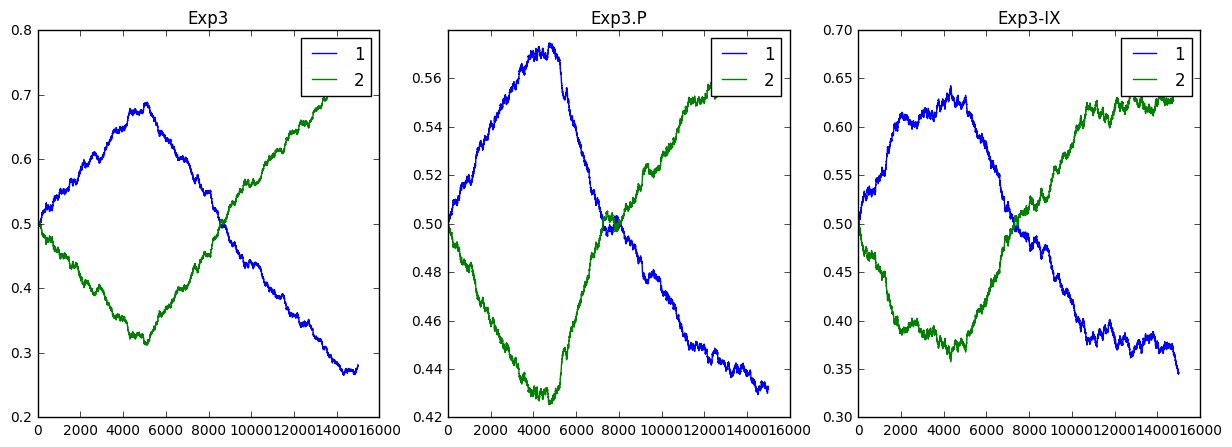

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

plt.plot(Prob[0])
plt.legend([1, 2])
plt.title("Exp3")

plt.subplot(1, 3, 2)

plt.plot(Prob[1])
plt.legend([1, 2])
plt.title("Exp3.P")

plt.subplot(1, 3, 3)
plt.plot(Prob[2])
plt.title("Exp3-IX")
plt.legend([1, 2])

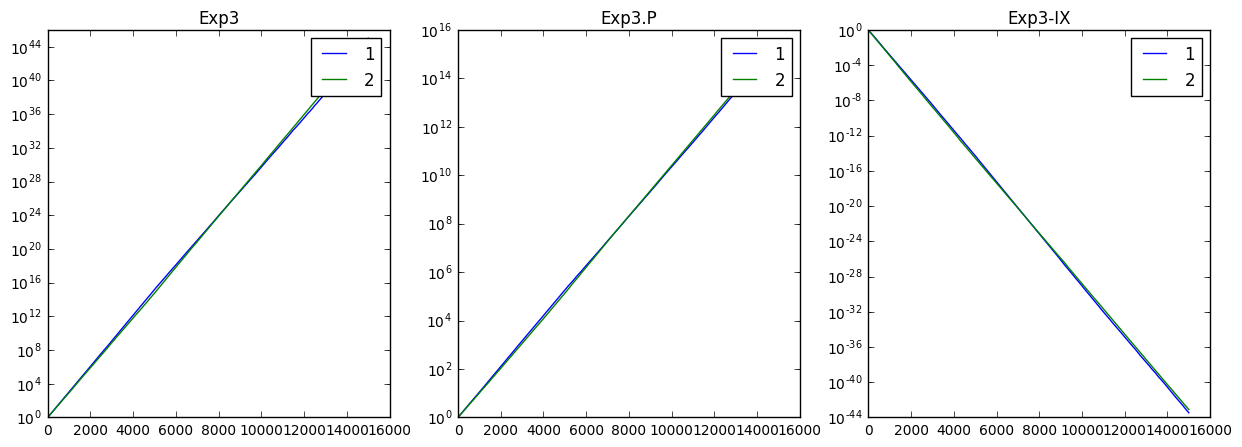

In [28]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

plt.semilogy()
plt.plot(Weights[0])
plt.title("Exp3")
plt.legend([1, 2])

plt.subplot(1, 3, 2)

plt.semilogy()
plt.plot(Weights[1])
plt.title("Exp3.P")
plt.legend([1, 2])

plt.subplot(1, 3, 3)

plt.semilogy()
plt.plot(Weights[2])
plt.title("Exp3-IX")

plt.legend([1, 2])

## 3rd environment

In [37]:
T = 25000
T2 = 5000
MAB_simple = [evolvingBernoulliArm([0.9, 0.4], T2)]
MAB_simple.append(evolvingBernoulliArm([0.1, 0.6], T2))

In [41]:
best_cumsum = [0.4 * t for t in range(1, T2 + 1)]
best_cumsum += [0.4 * T2 + 0.6 * (t -  T2) for t in range(T2 + 1, T + 1)]

## Hyperparameters


In [38]:
K = len(MAB_simple)
eta_exp3 = np.sqrt(2 * np.log(K) / T * K)
gamma_exp3 = np.sqrt(K * log(K) / ((np.exp(1) - 1) * T))

delta = 0.05
eta_exp3P = 0.95 * np.sqrt(np.log(K) / (T * K))
gamma_exp3P = 1.05 * np.sqrt(np.log(K) * K / T)
beta = np.sqrt(np.log(K / delta) /  (T * K))

eta_exp3IX = np.sqrt(2 * np.log(K) / T * K)

In [39]:
print(eta_exp3, gamma_exp3, delta, eta_exp3P, gamma_exp3P, beta, eta_exp3IX)

0.0105310753909 0.00568081341724 0.05 0.00353713254051 0.00781892456322 0.00858938816693 0.0105310753909


## Experiment

In [40]:
nb_iter = 50
Weights = np.zeros((3, T, K))
Rewards = np.zeros((nb_iter, 4, T))
Prob = np.zeros((3, T, K))
nb_iter = 50

for i in range(nb_iter):
    #run 4 algorithms
    rew, weights_exp, proba_hist_exp3 = exp3_Bianchi(MAB_simple, T, eta_exp3, gamma=gamma_exp3)
    rew_P, weights_expP, proba_hist_expP = exp3P_Bianchi(MAB_simple, T, beta=beta, gamma=gamma_exp3P, eta=eta_exp3P)
    rew_IX, weights_expIX, proba_hist_expIX = exp3_IX(MAB_simple, T, eta_exp3IX, gamma=eta_exp3IX / 2)
    rew_UCB, _ = UCB1(MAB_simple, T, rho=0.2)
    #calculate cumulated reward
    rewUCB_cumsum = np.cumsum(rew_UCB)
    rew_cumsum = np.cumsum(rew)
    rewP_cumsum = np.cumsum(rew_P)
    rewIX_cumsum = np.cumsum(rew_IX)
    #save cumulated rewards, weights and probability distribution
    Rewards[i] = [rew_cumsum, rewP_cumsum, rewIX_cumsum, rewUCB_cumsum]
    Weights += [weights_exp, weights_expP, weights_expIX]
    Prob += [proba_hist_exp3, proba_hist_expP, proba_hist_expIX]
# calculate statistics
Rewards_cum = np.mean(Rewards, axis=0)
Rewards_std = np.std(Rewards, axis=0)
Weights /= nb_iter
Prob /= nb_iter

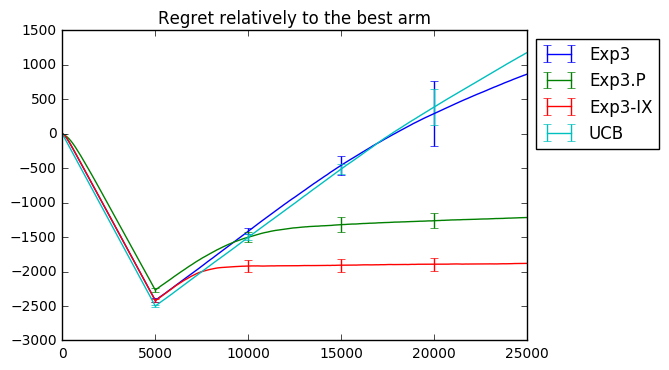

In [42]:
#cumulated rewards with std plot
plt.errorbar(np.arange(T), best_cumsum - Rewards_cum[0], Rewards_std[0], errorevery=5000, label="Exp3")
plt.errorbar(np.arange(T), best_cumsum - Rewards_cum[1], Rewards_std[1], errorevery=5000, label="Exp3.P")
plt.errorbar(np.arange(T), best_cumsum - Rewards_cum[2], Rewards_std[2], errorevery=5000, label="Exp3-IX")
plt.errorbar(np.arange(T), best_cumsum - Rewards_cum[3], Rewards_std[3], errorevery=5000, label="UCB")
delta = 0.05
#0.95 bound for Exp3-IX
if False:
    plt.plot([2 * np.sqrt(K * t * np.log(K)) + (np.sqrt(2 * K * t / (log(K))) + 1) * log(2 / delta) for t in range(1, T + 1)], label="0.95 Exp3-IX probability bound")
    plt.plot([5.15 * np.sqrt(t * K / np.log(K / delta)) for t in range(T)], label="Exp3.P 0.95 probability bound")
plt.legend(loc="upper left", bbox_to_anchor=(1., 1.))
plt.title("Regret relatively to the best arm")


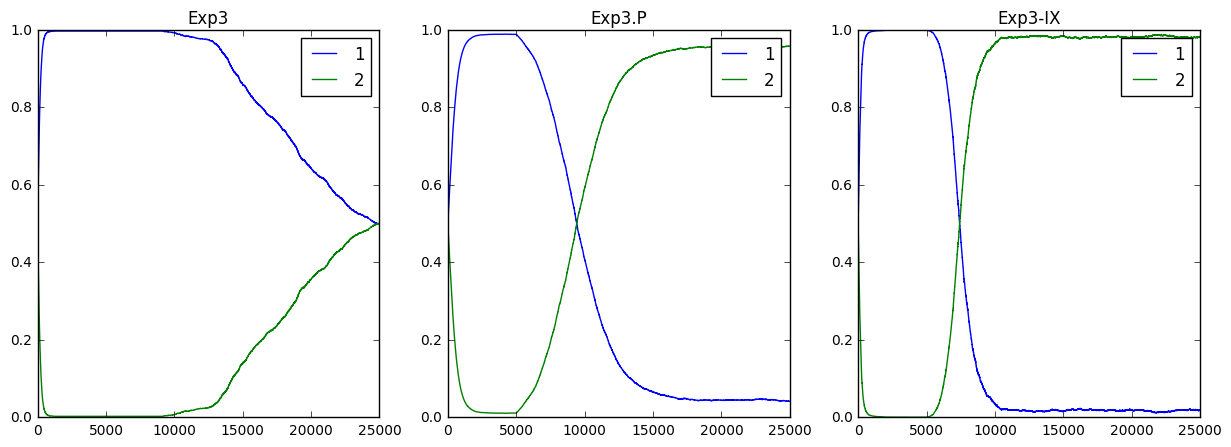

In [43]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

plt.plot(Prob[0])
plt.legend([1, 2])
plt.title("Exp3")

plt.subplot(1, 3, 2)

plt.plot(Prob[1])
plt.legend([1, 2])
plt.title("Exp3.P")

plt.subplot(1, 3, 3)
plt.plot(Prob[2])
plt.title("Exp3-IX")
plt.legend([1, 2])

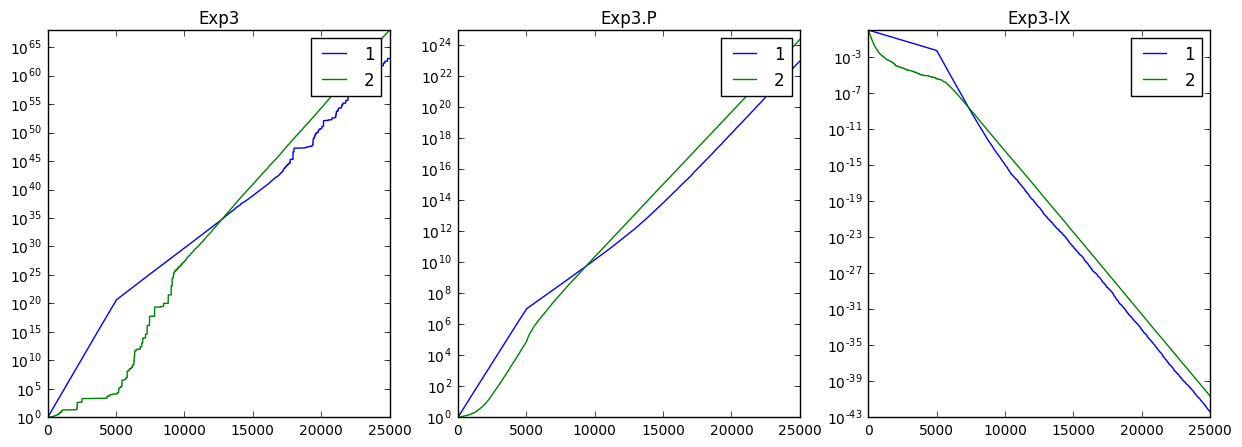

In [44]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

plt.semilogy()
plt.plot(Weights[0])
plt.title("Exp3")
plt.legend([1, 2])

plt.subplot(1, 3, 2)

plt.semilogy()
plt.plot(Weights[1])
plt.title("Exp3.P")
plt.legend([1, 2])

plt.subplot(1, 3, 3)

plt.semilogy()
plt.plot(Weights[2])
plt.title("Exp3-IX")

plt.legend([1, 2])